In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_customer = pd.read_csv(r"C:\Users\theop\Documents\Working Space\Rakamin Academy\Virtual Internships\202309_Data Scientist Kalbe Nutritionals\M4\Final Project\Data Case Study\Customer.csv", delimiter=';')
df_product = pd.read_csv(r"C:\Users\theop\Documents\Working Space\Rakamin Academy\Virtual Internships\202309_Data Scientist Kalbe Nutritionals\M4\Final Project\Data Case Study\Product.csv", delimiter=';')
df_store = pd.read_csv(r"C:\Users\theop\Documents\Working Space\Rakamin Academy\Virtual Internships\202309_Data Scientist Kalbe Nutritionals\M4\Final Project\Data Case Study\Store.csv", delimiter=';')
df_transaction = pd.read_csv(r"C:\Users\theop\Documents\Working Space\Rakamin Academy\Virtual Internships\202309_Data Scientist Kalbe Nutritionals\M4\Final Project\Data Case Study\Transaction.csv", delimiter=';')

In [3]:
df_customer.head()

,CustomerID,Age,Gender,Marital Status,Income
0,1,55,1,Married,"5,12"
1,2,60,1,Married,"6,23"
2,3,32,1,Married,"9,17"
3,4,31,1,Married,"4,87"
4,5,58,1,Married,"3,57"


In [4]:
df_customer.duplicated().sum()

0

In [5]:
df_customer.isnull().sum()

CustomerID        0
Age               0
Gender            0
Marital Status    3
Income            0
dtype: int64

In [6]:
df_customer[df_customer['Marital Status'].isnull()]

,CustomerID,Age,Gender,Marital Status,Income
9,10,34,1,NaN,4
415,416,27,1,NaN,"3,43"
442,443,33,1,NaN,"9,28"


In [8]:
df_product.head()

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200


In [9]:
df_product.duplicated().sum()

0

In [10]:
df_product.isnull().sum()

ProductID       0
Product Name    0
Price           0
dtype: int64

In [11]:
df_store.head()

,StoreID,StoreName,GroupStore,Type,Latitude,Longitude
0,1,Prima Tendean,Prima,Modern Trade,"-6,2","106,816666"
1,2,Prima Kelapa Dua,Prima,Modern Trade,"-6,914864","107,608238"
2,3,Prima Kota,Prima,Modern Trade,"-7,797068","110,370529"
3,4,Gita Ginara,Gita,General Trade,"-6,966667","110,416664"
4,5,Bonafid,Gita,General Trade,"-7,250445","112,768845"


In [12]:
df_store.duplicated().sum()

0

In [13]:
df_store.isnull().sum()

StoreID       0
StoreName     0
GroupStore    0
Type          0
Latitude      0
Longitude     0
dtype: int64

In [14]:
df_transaction.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [15]:
df_transaction.duplicated().sum()

0

In [16]:
df_transaction.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [17]:
df_customer.dtypes

CustomerID         int64
Age                int64
Gender             int64
Marital Status    object
Income            object
dtype: object

In [18]:
#data cleansing df customer
df_customer['Income'] = df_customer ['Income'].replace('[,]','.',regex=True).astype('float')

In [19]:
#data cleansing df store
df_store['Latitude'] = df_store ['Latitude'].replace('[,]','.',regex=True).astype('float')
df_store['Longitude'] = df_store ['Longitude'].replace('[,]','.',regex=True).astype('float')

In [20]:
#data cleansing df transaction
df_transaction['Date'] = pd.to_datetime(df_transaction['Date'])

In [21]:
df_transaction['TransactionID'].value_counts()

TR71313    3
TR42197    2
TR90402    2
TR74019    2
TR49649    2
          ..
TR29792    1
TR23081    1
TR1691     1
TR98388    1
TR85684    1
Name: TransactionID, Length: 4908, dtype: int64

In [22]:
df_transaction[ df_transaction['TransactionID'] == 'TR71313' ]

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
1982,TR71313,117,2022-05-21,P1,8800,10,88000,8
3336,TR71313,401,2022-08-30,P3,7500,6,45000,11
3722,TR71313,370,2022-09-26,P3,7500,2,15000,3


In [23]:
#gabung semua data
df_merge = pd.merge(df_transaction, df_customer, on=['CustomerID'])
df_merge = pd.merge(df_merge, df_product.drop(columns=['Price']), on=['ProductID'])
df_merge = pd.merge(df_merge, df_store, on=['StoreID'])

In [58]:
df_merge[df_merge['Marital Status'].isnull()].shape

(44, 17)

In [57]:
df_merge.head()

,TransactionID,CustomerID,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
Date,,,,,,,,,,,,,,,,,
2022-01-01,TR11369,328,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2022-07-17,TR89318,183,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2022-09-26,TR9106,123,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2022-08-01,TR4331,335,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2022-10-01,TR6445,181,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [25]:
df_regresi = df_merge.groupby(['Date']).agg({
    'Qty' : 'sum'
}).reset_index()

In [26]:
df_regresi

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
360,2022-12-27,70
361,2022-12-28,68
362,2022-12-29,42
363,2022-12-30,44


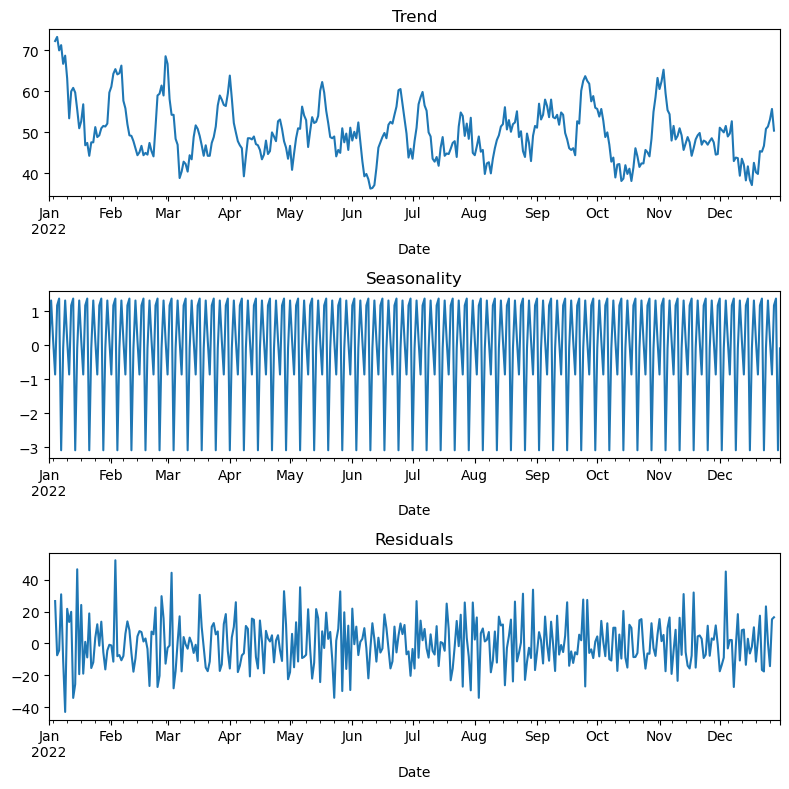

In [27]:
decomposed = seasonal_decompose(df_regresi.set_index('Date'))

plt.figure(figsize=(8,8))

plt.subplot(311)
decomposed.trend.plot(ax=plt.gca())
plt.title('Trend')
plt.subplot(312)
decomposed.seasonal.plot(ax=plt.gca())
plt.title('Seasonality')
plt.subplot(313)
decomposed.resid.plot(ax=plt.gca())
plt.title('Residuals')
                    
plt.tight_layout()

In [28]:
from statsmodels.tsa.stattools import adfuller
result =adfuller(df_regresi['Qty'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -19.018783
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.870
	10%: -2.571


In [29]:
cut_off = round(df_regresi.shape[0] * 0.8)
df_train = df_regresi[:cut_off]
df_test = df_regresi[cut_off:].reset_index(drop=True) 
df_train.shape, df_test.shape

((292, 2), (73, 2))

In [30]:
df_train

,Date,Qty
0,2022-01-01,49
1,2022-01-02,50
2,2022-01-03,76
3,2022-01-04,98
4,2022-01-05,67
...,...,...
287,2022-10-15,33
288,2022-10-16,26
289,2022-10-17,53
290,2022-10-18,47


In [31]:
df_test

,Date,Qty
0,2022-10-20,39
1,2022-10-21,35
2,2022-10-22,56
3,2022-10-23,59
4,2022-10-24,39
...,...,...
68,2022-12-27,70
69,2022-12-28,68
70,2022-12-29,42
71,2022-12-30,44


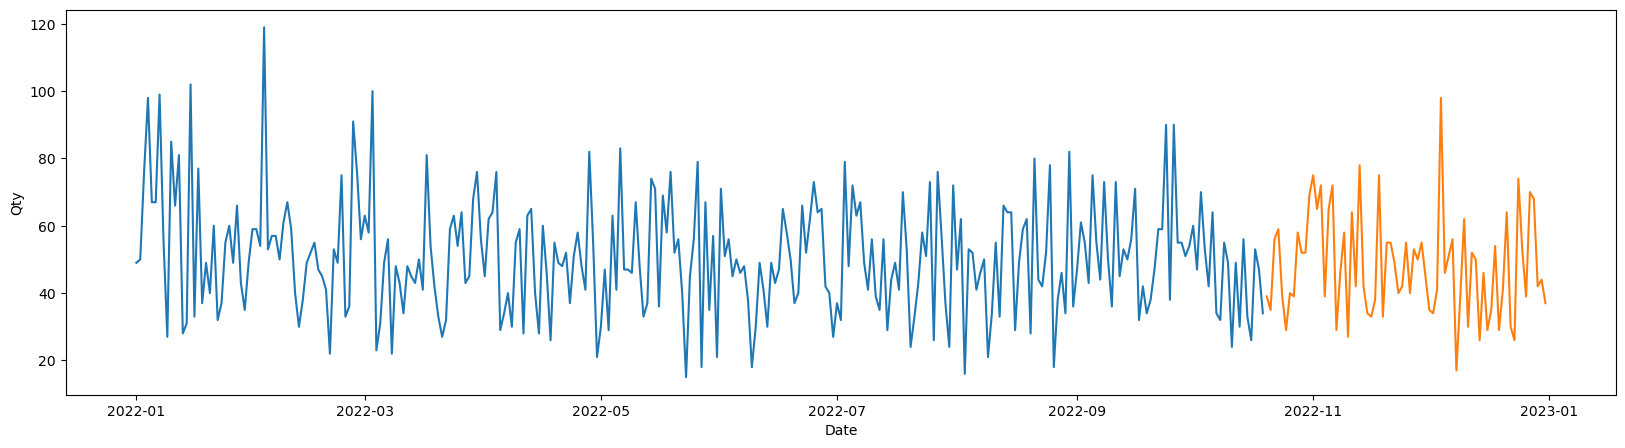

In [32]:
plt.figure(figsize=(20,5))
sns.lineplot(data=df_train, x=df_train['Date'], y=df_train['Qty']);
sns.lineplot(data=df_test, x=df_test['Date'], y=df_test['Qty']);

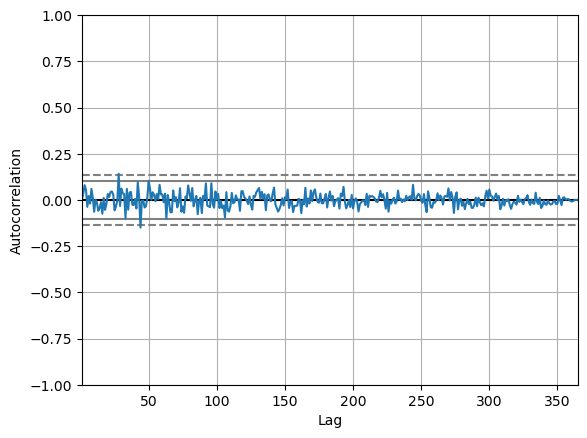

In [33]:
autocorrelation_plot(df_regresi['Qty']);

In [34]:
def rmse(y_actual, y_pred):
    """
    function to calculate RMSE
    """
    
    print(f'RMSE value {mean_squared_error(y_actual, y_pred)**0.5}')
    
def eval (y_actual, y_pred):
    """
    function to eval machine learning modelling
    """
    
    rmse(y_actual, y_pred)
    print(f'MAE value {mean_absolute_error(y_actual, y_pred)}')

In [35]:
print(df_train.columns)

Index(['Date', 'Qty'], dtype='object')


In [36]:
print(df_train.head())

        Date  Qty
0 2022-01-01   49
1 2022-01-02   50
2 2022-01-03   76
3 2022-01-04   98
4 2022-01-05   67


In [37]:
for column in df_train.columns:
    print(column)

Date
Qty


In [38]:
# Reset the index and move 'date' values to a column
df_train.reset_index(inplace=True)

In [39]:
df_train.set_index('Date', inplace=True)

In [40]:
df_merge

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
1,TR89318,183,2022-07-17,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2,TR9106,123,2022-09-26,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
3,TR4331,335,2022-08-01,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
4,TR6445,181,2022-10-01,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5015,TR69555,221,2022-01-08,P4,12000,3,36000,4,23,1,Single,7.50,Potato Chip,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5016,TR21587,425,2022-10-17,P4,12000,1,12000,4,58,1,Married,7.22,Potato Chip,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5017,TR51183,409,2022-07-19,P4,12000,1,12000,4,47,0,Married,28.23,Potato Chip,Gita Ginara,Gita,General Trade,-6.966667,110.416664
5018,TR14963,374,2022-12-16,P4,12000,5,60000,4,32,0,Single,5.40,Potato Chip,Gita Ginara,Gita,General Trade,-6.966667,110.416664


In [41]:
df_merge = df_merge.set_index('Date')

RMSE value 15.472406939265394
MAE value 12.357105067955237


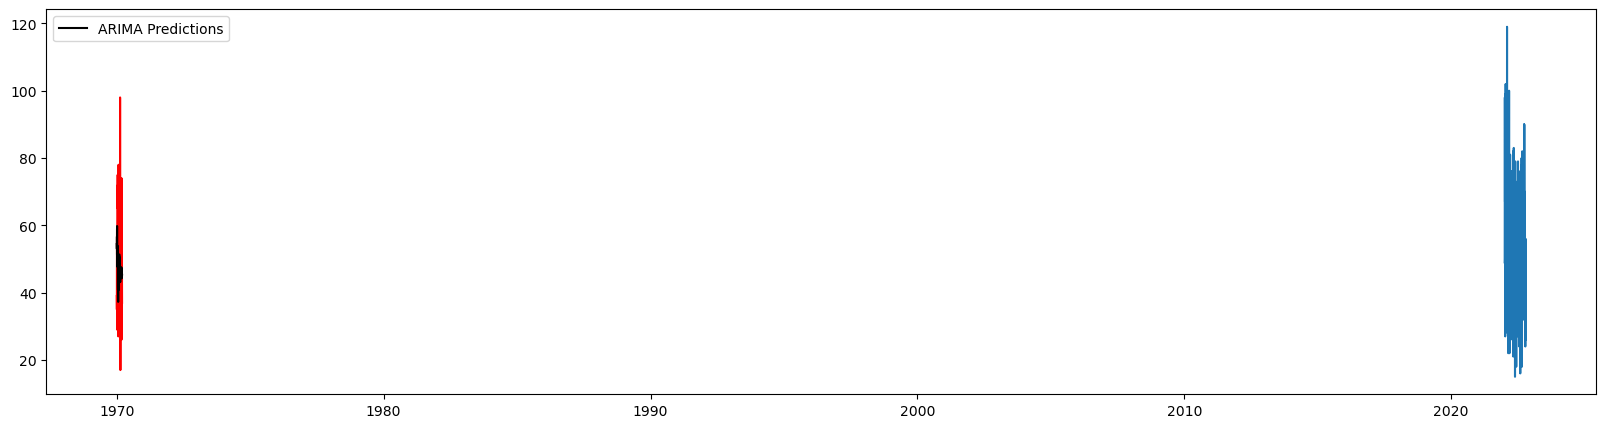

In [42]:
#ARIMA
# df_train = df_train.set_index('Date')
# df_test = df_train.set_index('Date')

y = df_train['Qty']

ARIMAmodel = ARIMA(y, order = (40, 2, 1))
ARIMAmodel = ARIMAmodel. fit()

y_pred = ARIMAmodel.get_forecast(len(df_test))

y_pred_df = y_pred.conf_int()
y_pred_df['predictions'] = ARIMAmodel.predict(start =y_pred_df.index[0], end =y_pred_df.index[-1])
y_pred_df.index = df_test.index
y_pred_out = y_pred_df['predictions']
eval(df_test['Qty'], y_pred_out)

plt.figure(figsize=[20,5])
plt.plot(df_train['Qty'])
plt.plot(df_test['Qty'], color='red')
plt.plot(y_pred_out, color='black', label = 'ARIMA Predictions')
plt.legend()

In [43]:
df_merge.head()

,TransactionID,CustomerID,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,StoreName,GroupStore,Type,Latitude,Longitude
Date,,,,,,,,,,,,,,,,,
2022-01-01,TR11369,328,P3,7500,4,30000,12,36,0,Married,10.53,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2022-07-17,TR89318,183,P3,7500,1,7500,12,27,1,Single,0.18,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2022-09-26,TR9106,123,P3,7500,4,30000,12,34,0,Married,4.36,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2022-08-01,TR4331,335,P3,7500,3,22500,12,29,1,Single,4.74,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554
2022-10-01,TR6445,181,P3,7500,4,30000,12,33,1,Married,9.94,Crackers,Prestasi Utama,Prestasi,General Trade,-2.990934,104.756554


In [44]:
#Redundant identification
df_merge.corr()

,CustomerID,Price,Qty,TotalAmount,StoreID,Age,Gender,Income,Latitude,Longitude
CustomerID,1.000000,-0.016423,-0.009755,-0.024915,0.004129,-0.025952,-0.009947,0.005783,0.002278,-0.003122
Price,-0.016423,1.000000,-0.353640,0.440632,-0.032863,0.014693,0.010705,0.001196,-0.029008,0.018652
Qty,-0.009755,-0.353640,1.000000,0.621129,0.014365,-0.027768,-0.010542,-0.028425,-0.004170,0.004807
TotalAmount,-0.024915,0.440632,0.621129,1.000000,-0.010722,-0.016900,-0.008774,-0.025350,-0.029938,0.025437
StoreID,0.004129,-0.032863,0.014365,-0.010722,1.000000,-0.003872,-0.000189,0.001613,0.471852,-0.094943
Age,-0.025952,0.014693,-0.027768,-0.016900,-0.003872,1.000000,-0.033183,0.486692,0.009266,0.015951
Gender,-0.009947,0.010705,-0.010542,-0.008774,-0.000189,-0.033183,1.000000,-0.071443,-0.006051,-0.001183
Income,0.005783,0.001196,-0.028425,-0.025350,0.001613,0.486692,-0.071443,1.000000,0.015518,0.004385
Latitude,0.002278,-0.029008,-0.004170,-0.029938,0.471852,0.009266,-0.006051,0.015518,1.000000,-0.395995
Longitude,-0.003122,0.018652,0.004807,0.025437,-0.094943,0.015951,-0.001183,0.004385,-0.395995,1.000000


In [45]:
df_cluster = df_merge.groupby(['CustomerID']).agg({
    'TransactionID': 'count',
    'TotalAmount' : 'sum',
    'Qty': 'sum',
    'Age': 'first'
}).reset_index()

In [46]:
df_cluster.head()

,CustomerID,TransactionID,TotalAmount,Qty,Age
0,1,17,623300,60,55
1,2,13,392300,57,60
2,3,15,446200,56,32
3,4,10,302500,46,31
4,5,7,268600,27,58


In [47]:
data_cluster = df_cluster.drop(columns=['CustomerID'])

data_cluster_normalize = preprocessing.normalize(data_cluster)

In [48]:
data_cluster_normalize

array([[2.72741855e-05, 9.99999991e-01, 9.62618313e-05, 8.82400120e-05],
       [3.31379039e-05, 9.99999977e-01, 1.45296963e-04, 1.52944172e-04],
       [3.36172116e-05, 9.99999989e-01, 1.25504257e-04, 7.17167182e-05],
       ...,
       [3.06539506e-05, 9.99999989e-01, 1.15803813e-04, 8.68528601e-05],
       [2.59862978e-05, 9.99999986e-01, 9.92204096e-05, 1.34656270e-04],
       [2.95925332e-05, 9.99999987e-01, 9.56066457e-05, 1.22922830e-04]])

In [49]:
K = range(2, 8)
fits = []
score = []

for k in K:
    model = KMeans(n_clusters=k, random_state=0, n_init='auto').fit(data_cluster_normalize)
    
    fits.append(model)
    
    score.append(silhouette_score(data_cluster_normalize, model.labels_, metric='euclidean'))

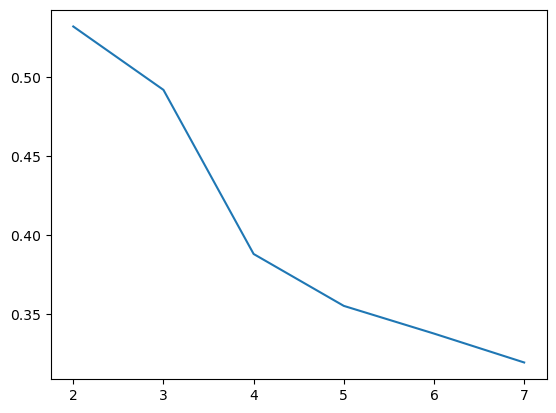

In [50]:
#choose 4 cluster
sns.lineplot(x = K, y = score);

In [51]:
fits[2]

KMeans(n_clusters=4, n_init='auto', random_state=0)

In [52]:
df_cluster['cluster_label'] = fits[2].labels_

In [53]:
df_cluster

,CustomerID,TransactionID,TotalAmount,Qty,Age,cluster_label
0,1,17,623300,60,55,1
1,2,13,392300,57,60,0
2,3,15,446200,56,32,1
3,4,10,302500,46,31,0
4,5,7,268600,27,58,2
...,...,...,...,...,...,...
442,443,16,485100,59,33,1
443,444,18,577700,62,53,1
444,445,18,587200,68,51,1
445,446,11,423300,42,57,0


In [54]:
df_cluster.groupby(['cluster_label']).agg({
    'CustomerID' : 'count',
    'Age' : 'mean',
    'TransactionID' : 'mean',
    'Qty' : 'mean',
    'TotalAmount' : 'sum'
})

,CustomerID,Age,TransactionID,Qty,TotalAmount
cluster_label,,,,,
0,149,43.872483,11.281879,39.832215,52401000
1,187,31.096257,12.834225,48.427807,82644700
2,91,48.560440,8.934066,31.318681,23659700
3,20,50.600000,6.300000,22.750000,3337600
